In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rmisra/news-category-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/dominikakaminska/.cache/kagglehub/datasets/rmisra/news-category-dataset/versions/3


In [3]:
import os

os.listdir(path)


['News_Category_Dataset_v3.json']

In [5]:
import json
import pandas as pd

data_file = os.path.join(path, "News_Category_Dataset_v3.json")

with open(data_file, "r") as f:
    data = [json.loads(line) for line in f]

df = pd.DataFrame(data)
df.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209527 non-null  object
 2   category           209527 non-null  object
 3   short_description  209527 non-null  object
 4   authors            209527 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [7]:
df.isnull().sum()


link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [8]:
df["document"] = (
    df["headline"].fillna("") + " " + df["short_description"].fillna("")
)

df[["headline", "short_description", "document"]].head()


,headline,short_description,document
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,Over 4 Million Americans Roll Up Sleeves For O...
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,"American Airlines Flyer Charged, Banned For Li..."
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",23 Of The Funniest Tweets About Cats And Dogs ...
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",The Funniest Tweets From Parents This Week (Se...
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,Woman Who Called Cops On Black Bird-Watcher Lo...


In [9]:
df["doc_length"] = df["document"].apply(lambda x: len(x.split()))

df["doc_length"].describe()


count    209527.000000
mean         29.269770
std          13.803927
min           0.000000
25%          20.000000
50%          28.000000
75%          35.000000
max         245.000000
Name: doc_length, dtype: float64

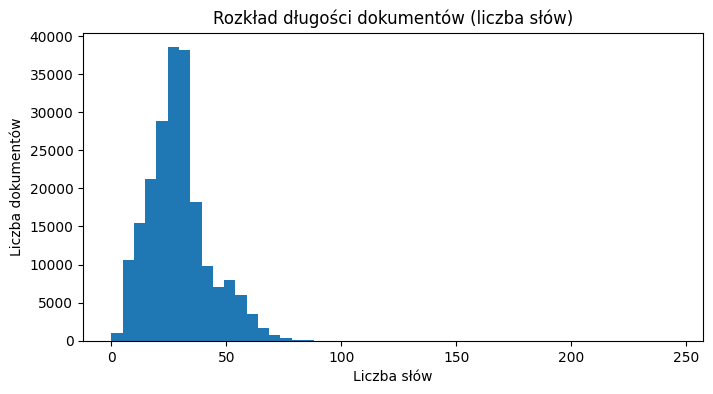

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df["doc_length"], bins=50)
plt.title("Rozkład długości dokumentów (liczba słów)")
plt.xlabel("Liczba słów")
plt.ylabel("Liczba dokumentów")
plt.show()


In [12]:
df["category"].value_counts().head(10)


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
Name: count, dtype: int64

In [13]:
print(df.loc[0, "document"])


Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.


In [14]:
from collections import Counter

sample_text = " ".join(df["document"].sample(5000)).lower().split()
Counter(sample_text).most_common(20)


[('the', 6329),
 ('to', 3926),
 ('of', 3214),
 ('a', 3171),
 ('and', 2861),
 ('in', 2391),
 ('is', 1581),
 ('for', 1518),
 ('that', 1186),
 ('on', 1171),
 ('you', 968),
 ('with', 942),
 ('are', 819),
 ('i', 770),
 ('it', 714),
 ('this', 693),
 ('your', 668),
 ('be', 666),
 ('at', 641),
 ('as', 637)]